In [3]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nlp import nlp as nlp

LangProcessor = nlp()

In [4]:
with open("anal.pickle", "rb") as f:
    data = pickle.load(f)


corpus = []
cols = []

for d in data:
    corpus.append(d['text'])

for d in data:
    cols.append(d['link'])    

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01, decode_error='ignore', strip_accents='unicode', analyzer='word',
    tokenizer=LangProcessor.tokenize)

In [6]:
X = vectorizer.fit_transform(corpus)

In [7]:
feature_names = vectorizer.get_feature_names()

In [8]:
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,a57978149,aaron,ability,absence,absolute,absolutely,abstract,abstraction,academia,academic,...,xlabel,y_pred,y_test,y_train,yellow,yield,ylabel,yoshua,young,youtube
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.016302,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.034804,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.045655,0.0,0.0,0.0,0.019627
4,0.0,0.0,0.048508,0.0,0.000000,0.036512,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [9]:
dat = df.transpose()

recs = []

# Find the top 30 words written by each author
top_dict = {}
for c in range(0,len(cols)):
    top = dat.iloc[:,c].sort_values(ascending=False).head(30)
    top_dict[dat.columns[c]]= list(zip(top.index, top.values))# Print the top 15 words from each article
for p, top_words in top_dict.items():
    rec = {'link': cols[p]}
    index = 0
    for word, count in top_words[0:5]:
        rec[str(index)+" term"] = word
        rec[str(index)+" termCounts"] = count
        index = index+1

    stats = LangProcessor.stats(data[p]['text'])
    sentiment = LangProcessor.lang_senti(data[p]['text'])
    rec['standard'] = stats['standard']
    rec['lexCount'] = stats['lexicon count'] 
    rec['flesch'] = stats['flesch_reading_ease']
    rec['pol'] = sentiment[0]
    rec['subjectivity'] = sentiment[1]
    recs.append(rec)

print(recs[0])



{'link': 'https://towardsdatascience.com/mle-vs-map-a989f423ae5c\n', '0 term': 'likelihood', '0 termCounts': 0.6171298762190844, '1 term': 'prior', '1 termCounts': 0.35137802726442197, '2 term': 'posterior', '2 termCounts': 0.2950282359933412, '3 term': 'maximum', '3 termCounts': 0.24896201210007757, '4 term': 'probability', '4 termCounts': 0.22718699971151268, 'standard': '16th and 17th grade', 'lexCount': 854, 'flesch': 30.5, 'pol': 0.06714682539682541, 'subjectivity': 0.3872619047619048}


In [10]:
with open("analytis.pickle", "wb") as f:
    pickle.dump(recs, f, pickle.HIGHEST_PROTOCOL)

In [11]:
dataframe = pd.DataFrame(recs)

In [12]:
dataframe.head()

,link,0 term,0 termCounts,1 term,1 termCounts,2 term,2 termCounts,3 term,3 termCounts,4 term,4 termCounts,standard,lexCount,flesch,pol,subjectivity
0,https://towardsdatascience.com/mle-vs-map-a989...,likelihood,0.617130,prior,0.351378,posterior,0.295028,maximum,0.248962,probability,0.227187,16th and 17th grade,854,30.50,0.067147,0.387262
1,https://towardsdatascience.com/least-squares-6...,linear,0.383977,square,0.374947,approximation,0.309743,picture,0.267822,error,0.255748,18th and 19th grade,1886,9.93,0.033372,0.451576
2,https://towardsdatascience.com/louvain-algorit...,community,0.643669,weight,0.317762,connecting,0.216789,algorithm,0.214877,optimization,0.213067,19th and 20th grade,441,17.20,0.047810,0.449745
3,https://towardsdatascience.com/espresso-soak-t...,espresso,0.698455,coffee,0.618875,water,0.239006,extraction,0.084536,experiment,0.076802,16th and 17th grade,541,26.37,0.121964,0.539365
4,https://towardsdatascience.com/extra-trees-ple...,forest,0.265344,extra,0.251264,recall,0.240579,health,0.219622,classifier,0.202509,13th and 14th grade,1571,43.46,0.153152,0.491663


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   link          319 non-null    object 
 1   0 term        319 non-null    object 
 2   0 termCounts  319 non-null    float64
 3   1 term        319 non-null    object 
 4   1 termCounts  319 non-null    float64
 5   2 term        319 non-null    object 
 6   2 termCounts  319 non-null    float64
 7   3 term        319 non-null    object 
 8   3 termCounts  319 non-null    float64
 9   4 term        319 non-null    object 
 10  4 termCounts  319 non-null    float64
 11  standard      319 non-null    object 
 12  lexCount      319 non-null    int64  
 13  flesch        319 non-null    float64
 14  pol           319 non-null    float64
 15  subjectivity  319 non-null    float64
dtypes: float64(8), int64(1), object(7)
memory usage: 40.0+ KB


In [48]:
import altair as alt

grades = {
'10th and 11th grade': '4: 10th-11th',
'11th and 12th grade': '5: 11th-12th',
'12th and 13th grade': '6: 12th-13th',
'13th and 14th grade': '7: 13th-14th',
'14th and 15th grade': '8: 14th-15th',
'15th and 16th grade': '9: 15th-16th',
'16th and 17th grade': '10: 16th-17th',  
'17th and 18th grade': '11: > 17th',  
'18th and 19th grade': '11: > 17th',  
'19th and 20th grade': '11: > 17th',  
'20th and 21st grade': '11: > 17th',  
'21st and 22nd grade': '11: > 17th', 
'22nd and 23rd grade': '11: > 17th',  
'23rd and 24th grade': '11: > 17th',  
'24th and 25th grade': '11: > 17th',  
'25th and 26th grade': '11: > 17th',  
'26th and 27th grade': '11: > 17th',
'27th and 28th grade': '11: > 17th', 
'28th and 29th grade': '11: > 17th',
'29th and 30th grade': '11: > 17th',
'30th and 31st grade': '11: > 17th', 
'31st and 32nd grade': '11: > 17th',
'32nd and 33rd grade': '11: > 17th', 
'35th and 36th grade': '11: > 17th',  
'36th and 37th grade': '11: > 17th',
'37th and 38th grade': '11: > 17th', 
'38th and 39th grade': '11: > 17th',
'3rd and 4th grade':   '1: 3rd-4th', 
'57th and 58th grade': '11: > 17th',
'8th and 9th grade':   '2: 8th-9th',
'9th and 10th grade':  '3: 9th-10th'}

def flesch(x):
    response = 'Extremely confusing'
    if x< 30:
        response = 'Very confusing'
    elif x>29 and x<50:
        response = 'Difficult'
    elif x>49 and x<60:
        response = 'Fairly Difficult'

    elif x>59 and x<70:
        response = 'Standard'

    elif x>69 and x<80:
        response = 'Fairly Easy'

    elif x>79 and x<90:
        response = 'Easy'

    elif x > 89:
        response = 'Very Easy'
 
    return response


dataframe['ReadingDiff'] = dataframe.flesch.apply(lambda x: flesch(x))

f = dataframe.groupby('standard').count()['link']
f = f.reset_index()
f.columns = ['Grade','Count']

f['cat']= f.Grade.apply(lambda x: grades[x])

f

,Grade,Count,cat
0,10th and 11th grade,2,4: 10th-11th
1,11th and 12th grade,10,5: 11th-12th
2,12th and 13th grade,9,6: 12th-13th
3,13th and 14th grade,17,7: 13th-14th
4,14th and 15th grade,31,8: 14th-15th
5,15th and 16th grade,35,9: 15th-16th
6,16th and 17th grade,35,10: 16th-17th
7,17th and 18th grade,38,11: > 17th
8,18th and 19th grade,30,11: > 17th
9,19th and 20th grade,32,11: > 17th


<AxesSubplot:>

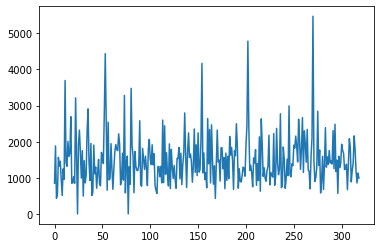

In [34]:
dataframe['lexCount'].plot()

In [89]:
p = (alt.
    Chart(dataframe).
    mark_circle(size=40).
    encode(x='pol',y='subjectivity').
    properties(height=200, width=400, title='objectivity versus polarity')    
    
)

p1Line = alt.Chart(dataframe).mark_rule(color='red').encode(y='mean(subjectivity):Q')
p2Line = alt.Chart(dataframe).mark_rule(color='red').encode(x='mean(pol):Q')

line = pd.DataFrame({'x': [0,0], 'y': [0,1]})
p3Line = alt.Chart(line).mark_line(color='green').encode(x='x',y='y')

p3 = p+p1Line+p2Line+p3Line

In [90]:
p1Line = alt.Chart(dataframe).mark_rule(color='red').encode(y='mean(flesch):Q')
p2Line = alt.Chart(dataframe).mark_rule(color='red').encode(x='mean(lexCount):Q')

p = (alt.
    Chart(dataframe).
    mark_circle(size=40).
    encode(x='lexCount', y='flesch').
    properties(height=200, width=400, title='Article length versus readability').
    interactive()

)

p1 = p+p1Line+p2Line

In [91]:
p2 = (alt.
    Chart(f).
    mark_bar().
    encode(x='cat',y='sum(Count):Q').
    properties(height=200, width=400, title='Standard reading score')
)

p2asc = p2.encode(alt.X(field='cat', type='nominal', sort='y'))

p4 = (alt.
    Chart(dataframe).
    mark_bar().
    encode(x = 'ReadingDiff', y='count()').
    properties(height=200, width=400, title='Reading level')
)

p4asc = p4.encode(alt.X(field='ReadingDiff', type='nominal', sort='y'))

In [92]:
p1 & p2asc | (p3 & p4asc)

alt.HConcatChart(...)

In [41]:
flesch(-9), flesch(109)

('Very confusing', 'Very Easy')